# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [59]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
import requests

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [60]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

622

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [61]:
#Create url for response
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{url}appid={api_key}&units={units}&q="

#Create empty lists to store weather variables
city_num = []
cloudiness = []
city_name = []
country = []
lat = []
lng = []
date = []
humidity = []
max_temp = []
wind_speed = []

#Create for loop. Use enumerate to assign index to city record. Try and except to let for loop run when
#a city is not found.
for index, city in enumerate(cities, start=1):
    try:
        response = requests.get(query_url+city).json()
        print(f'Processing Record {index} | {city}')
        city_num.append(response['id'])
        city_name.append(response['name'])
        cloudiness.append(response['clouds']['all'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        humidity.append(response['main']['humidity'])
        lat.append(response['coord']['lat'])
        lng.append(response['coord']['lon'])
        max_temp.append(response['main']['temp_max'])
        wind_speed.append(response['wind']['speed'])
    except KeyError:
        print('City not found. Skipping...')

Processing Record 1 | rikitea
Processing Record 2 | castro
Processing Record 3 | grand gaube
Processing Record 4 | avarua
Processing Record 5 | tuktoyaktuk
Processing Record 6 | kodiak
Processing Record 7 | kapaa
Processing Record 8 | puerto ayora
Processing Record 9 | natchitoches
Processing Record 10 | quatre cocos
Processing Record 11 | stornoway
City not found. Skipping...
Processing Record 12 | lavrentiya
Processing Record 13 | hilo
Processing Record 14 | lebu
Processing Record 15 | araouane
Processing Record 16 | new norfolk
Processing Record 17 | shimoda
Processing Record 18 | cape town
Processing Record 19 | hualmay
Processing Record 20 | poltavka
Processing Record 21 | punta arenas
Processing Record 22 | vila velha
Processing Record 23 | mar del plata
Processing Record 24 | morros
Processing Record 25 | zhezkazgan
Processing Record 26 | adana
Processing Record 27 | nyimba
Processing Record 28 | kondinskoye
Processing Record 29 | qaanaaq
Processing Record 30 | talnakh
Processin

Processing Record 232 | port hedland
Processing Record 233 | karakose
City not found. Skipping...
Processing Record 234 | ust-kut
Processing Record 235 | emerald
Processing Record 236 | kozhva
Processing Record 237 | tarabuco
Processing Record 238 | huayucachi
Processing Record 239 | syasstroy
Processing Record 240 | victoria
Processing Record 241 | port macquarie
Processing Record 242 | geraldton
Processing Record 243 | guiren
Processing Record 244 | nagorsk
Processing Record 245 | manggar
Processing Record 246 | whitehorse
Processing Record 247 | svetlaya
Processing Record 248 | trofors
Processing Record 249 | wanlaweyn
Processing Record 250 | ewa beach
Processing Record 251 | corn island
Processing Record 252 | angoram
Processing Record 253 | umzimvubu
City not found. Skipping...
Processing Record 254 | longlac
City not found. Skipping...
Processing Record 255 | caravelas
Processing Record 256 | hirara
Processing Record 257 | salmas
Processing Record 258 | katobu
Processing Record 2

Processing Record 462 | churapcha
Processing Record 463 | puerto escondido
Processing Record 464 | tuatapere
Processing Record 465 | snasa
Processing Record 466 | vanavara
Processing Record 467 | villamontes
Processing Record 468 | san carlos
Processing Record 469 | bayji
Processing Record 470 | xiongzhou
Processing Record 471 | sandakan
Processing Record 472 | maghama
City not found. Skipping...
Processing Record 473 | rakoshyno
Processing Record 474 | bukachacha
Processing Record 475 | ponta delgada
Processing Record 476 | okhotsk
Processing Record 477 | svetlyy
City not found. Skipping...
Processing Record 478 | inhambane
Processing Record 479 | mayo
Processing Record 480 | paka
Processing Record 481 | tocopilla
Processing Record 482 | grand river south east
City not found. Skipping...
Processing Record 483 | yanam
Processing Record 484 | chapais
Processing Record 485 | danilov
Processing Record 486 | rongcheng
Processing Record 487 | seydi
Processing Record 488 | klaksvik
Processin

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [63]:
#Create dataframe
weather_dict = {"City": city_name, 
      "Cloudiness":cloudiness,
      "Country":country, 
      "Date":date, 
      "Humidity":humidity, 
      "Lat":lat, 
      "Lng":lng, 
      "Max Temp": max_temp, 
      "Wind Speed":wind_speed
     }

df = pd.DataFrame(weather_dict)
df


,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Rikitea,100,PF,1552594104,100,-23.12,-134.97,75.44,18.75
1,Castro,20,CL,1552590000,59,-42.48,-73.76,62.60,8.05
2,Grand Gaube,20,MU,1552593844,83,-20.01,57.66,77.00,2.24
3,Avarua,64,CK,1552591800,74,-21.21,-159.78,82.40,18.34
4,Tuktoyaktuk,90,CA,1552590000,75,69.44,-133.03,-13.01,21.92
5,Kodiak,90,US,1552594104,98,39.95,-94.76,39.99,20.80
6,Kapaa,75,US,1552594099,65,22.08,-159.32,78.80,9.17
7,Puerto Ayora,0,EC,1552593812,69,-0.74,-90.35,82.40,11.41
8,Natchitoches,90,US,1552593959,38,31.76,-93.09,77.00,12.75
9,Quatre Cocos,20,MU,1552593844,83,-20.21,57.76,77.00,2.24


In [64]:
df.to_csv(output_data_file)

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

In [65]:
from datetime import datetime
ts = df["Date"][0]
date_title = datetime.utcfromtimestamp(ts).strftime('%m/%d/%y')

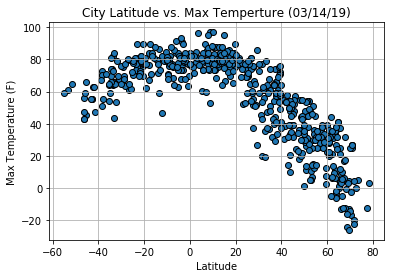

In [70]:
plt.scatter(df['Lat'], df['Max Temp'], edgecolors = 'black')
plt.title(f"City Latitude vs. Max Temperture ({date_title})")
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid()
plt.show()


#### Latitude vs. Humidity Plot

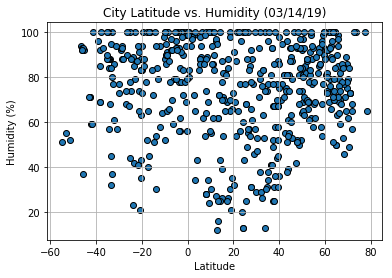

In [72]:
plt.scatter(df['Lat'], df['Humidity'], edgecolors = 'black')
plt.title(f"City Latitude vs. Humidity ({date_title})")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid()
plt.show()

#### Latitude vs. Cloudiness Plot

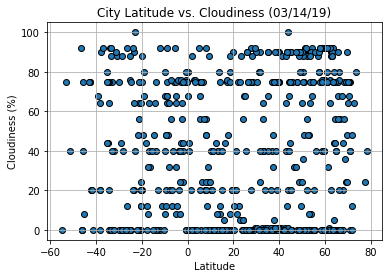

In [73]:
plt.scatter(df['Lat'], df['Cloudiness'], edgecolors = 'black')
plt.title(f"City Latitude vs. Cloudiness ({date_title})")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid()
plt.show()

#### Latitude vs. Wind Speed Plot

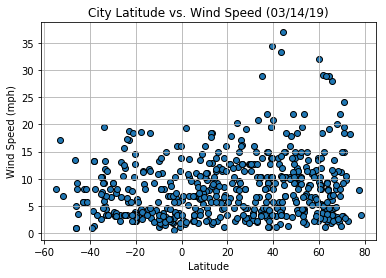

In [74]:
plt.scatter(df['Lat'], df['Wind Speed'], edgecolors = 'black')
plt.title(f"City Latitude vs. Wind Speed ({date_title})")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid()
plt.show()

Observable trends
1) As a city approaches the equator (latitude 0), the max temperature is higher.
2) Winds generally do not approach speeds faster than 20mph
3) Humidity seems complex and may not solely depend on latitude.
